# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "Curse of dimensionality". What does it mean in practice?

Przekleństwo wymiarowości dotyczy problemu wykładniczego wzrostu danych w uczeniu maszynowym. Oznacza to, że wraz ze wzrostem liczby cech/atrybutów (zwiększeniem wymiaru) potrzebujemy co raz więcej danych, aby móc poprawnie klasyfikować nowe przypadki. Wówczas oprócz wzrostu liczby możliwych wariantów, rośnie nam również złożoność alorytmu klasyfikującego.

**Question** How can we reduce the number of attributes in classification problems?

Możemy np dokonać wyboru najbardziej informatywnych cech (feature selection).

The following code fragment reads the dataset containing information about the recording of brain activity of people.
Each row contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The train and test split and standarization is already done. 
Your task is to classify the given data with k-NN with k=3 (as during previous laboratories) and measure the accuracy.

Next, try to eliminate the redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to the obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.spatial.distance import euclidean
from matplotlib import pyplot as plt

plt.rc('figure', figsize=(10, 6), dpi=80)

data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_X, train_data_Y)
    prediction = knn.predict(test_data_X)
    return accuracy_score(test_data_Y, prediction)

get_classification_accuracy(X_train, y_train, X_test, y_test)

0.4785243741765481

In [ ]:
best_k = SelectKBest(mutual_info_classif, k=30)
best_k.fit(X_train, y_train)
new_train = best_k.transform(X_train)
new_test = best_k.transform(X_test)

In [ ]:
get_classification_accuracy(new_train, y_train, new_test, y_test)

0.48853754940711464

In the exercice above we set the number of features arbitrarily. 

**Question** How can find the optimal number of attributes in machine learning problems?

# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

Clustering to metoda klasyfikacji bez nadzoru. Polega ona na dzieleniu zbioru danych na mniejsze grupy na podstawie wartości ich parametrów. Dzięki temu uzyskujemy grupy, w których dane są do siebie względnie podobne.

**Question** What clustering algorithms do you know?

k-means, grupowanie hierarchiczne, grupowanie gęstościowe 

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

1. Wybór centroidów
2. Przypisanie punktów do najbliższych centroidów
3. Wyznaczenie nowych centroidów
4. Powtarzanie kroku 2. i 3. aż do osiągniecia warunku stopu (brak poprawy lub osiągnięcie maksymalnej założonej liczby iteracji)

**Question** How can we choose the initial clusters?

Możemy wybrać losowo, wybrać k pierwszych obserwacji lub wybrać tak, aby zmaksymalizować odległości skupień. 

**Exercice**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?

Algorytm powinien zatrzymać się w momencie gdy działa już przez określoną wcześniej liczbę iteracji lub nie osiąga już poprawy.

**Question** What advantages and disadvantages of k-means clstering can you find?

#### Zalety:

- szybki
- łatwa implementacja
- prosty do zrozumienia

#### Wady

- wrażliwy na dobór startowych centroidów
- wymaga podania liczby grup na początku
- zakłada, że grupy są sferyczne

# 4. K-means with scikit-learn

### 4.1. Download files mouse.csv and lines.csv. They have multiple examples desribed with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

In [ ]:
import csv
import numpy as np
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.show()

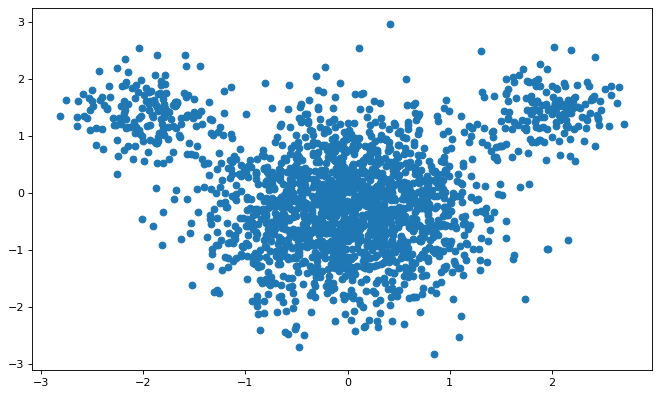

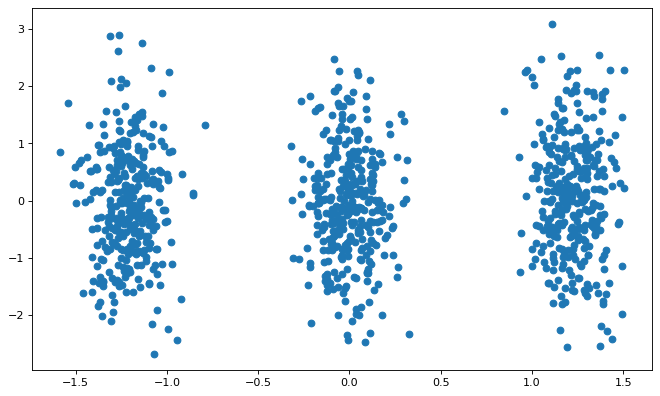

In [ ]:
mouse = read_file("mouse.csv")
lines = read_file("lines.csv")

plot_data(mouse)
plot_data(lines)

### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in previous exercice.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [ ]:
def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()

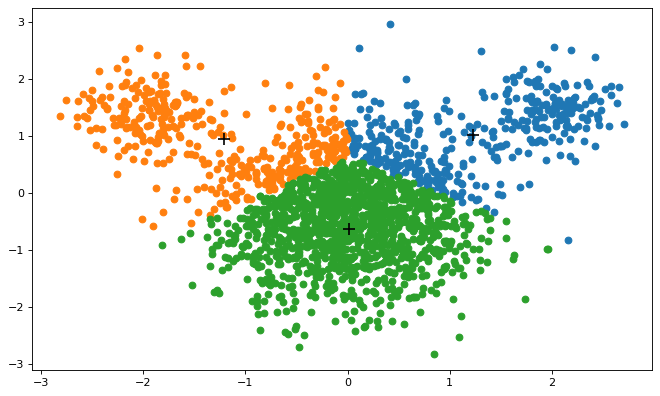

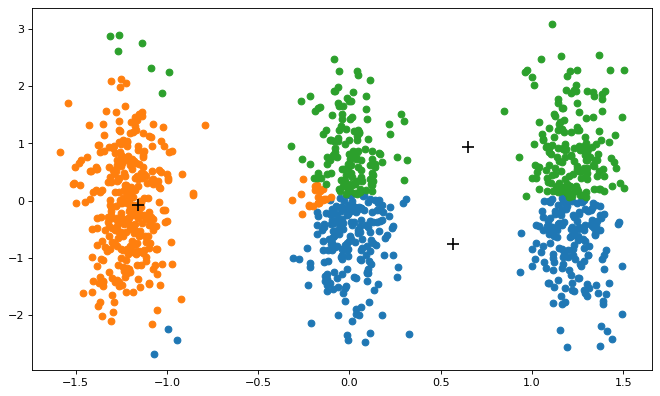

In [ ]:
from sklearn.cluster import KMeans

def get_clusters(X, y):
    return [X[np.where(y==i)] for i in range(np.amax(y)+1)]

kmeans_mouse = KMeans(n_clusters = 3)
#kmeans_mouse.fit(mouse)

kmeans_lines = KMeans(n_clusters = 3)
#kmeans_lines.fit(lines)

mouse_clusters = get_clusters(mouse, kmeans_mouse.fit_predict(mouse))
lines_clusters = get_clusters(lines, kmeans_lines.fit_predict(lines))

visualize_clusters(mouse_clusters, kmeans_mouse.cluster_centers_)
visualize_clusters(lines_clusters, kmeans_lines.cluster_centers_)

# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce number of features in unsupervised problems?

Możemy usunąć atrybuty z tą samą wartością dla każdego elementu w zbiorze danym lub atrybuty skorelowane.

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("customers.csv")
data = data.drop(columns="Address")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
print(data.shape[1])

9


In [ ]:
selector = VarianceThreshold(40)
data = selector.fit_transform(data)
print(data.shape[1])

5


# Homework

* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data containing data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the given input: normalization/standarization, attribute selection. 
* Try to describe the obtained groups based on the obtained centroids, what do all cereals within this group have in common?
* Write a report containing information about used preprocessing methods, number of cereals within each cluster and your conclusions about the clustering results.

**Deadline +2 weeks**

##1. Wczytanie danych

In [ ]:
data = pd.read_csv('cereal.csv')
data = data.drop(columns=['name', 'mfr'])
data['type'] = data['type'].replace(['H', 'C'], [0, 1])
data.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,1,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,1,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,1,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,1,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


###1.1 Oryginalna liczba atrybutów

In [ ]:
print(data.shape[1])

14


###1.2 Selekcja atrybutów za pomocą VarianceThreshold() i standaryzacja zbioru danych za pomocą StandardScaler().fit_transform()

In [ ]:
selector = VarianceThreshold(20)
data = selector.fit_transform(data)
print(f"Liczba atrybutów po selekcji: {data.shape[1]}")

standarized_data = StandardScaler().fit_transform(data)

5


##2. Implementacja algorytmu k-means

In [ ]:
def kMeans(data, centroid_numbers, iterations_number=200, epsilon=0.001):

  centroids = {}

  centroid_indexes = np.random.choice(range(data.shape[0]), centroid_numbers, replace=False)

  for i, index in enumerate(centroid_indexes):
    centroids[i] = data[index]

  for i in range(iterations_number):
    classifications = {}

    for j in range(centroid_numbers):
      classifications[j] = []

    for entry in data:
      entry_distances_to_centroids = []
      for centroid in centroids:
        entry_distances_to_centroids.append(euclidean(entry, centroids[centroid]))
      classification = entry_distances_to_centroids.index(min(entry_distances_to_centroids))
      classifications[classification].append(entry)

    previous_centroids = dict(centroids)

    for classification in classifications:
      centroids[classification] = np.average(classifications[classification], axis = 0)

    no_upgrade = True

    for centroid in centroids:
      prev_centroid = previous_centroids[centroid]
      cur_centroid = centroids[centroid]
      if np.sum((cur_centroid - prev_centroid) / prev_centroid * 100) > epsilon:
        no_upgrade = False

    if no_upgrade:
      print("Break after " + str(i) + " iteration due to no upgrade")
      break
    
  return centroids, classifications

###2.1 Przetestowanie algorytmu na zbiorze mouse.csv

Break after 20 iteration due to no upgrade


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


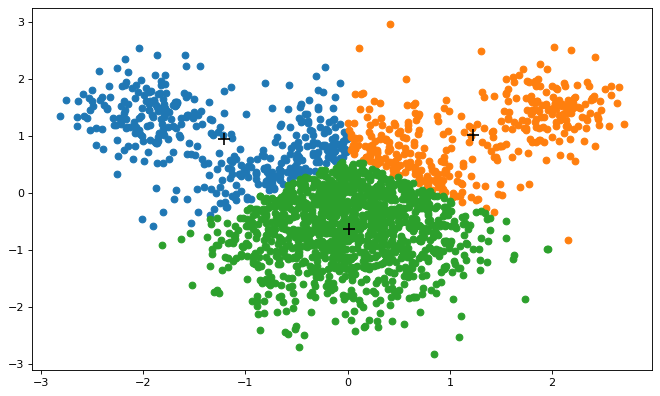

In [ ]:
data = pd.read_csv("mouse.csv")
data = StandardScaler().fit(data).transform(data)

centroids, classifications = kMeans(data, 3, 1000)

def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        points = np.zeros((c[0].shape[0], len(c)))
        for index, i in enumerate(c):
          points[0, index] = i[0]
          points[1, index] = i[1]
        plt.scatter(points[0,:], points[1,:])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()

visualize_clusters(np.array(list(classifications.values())), np.array([np.array(xi) for xi in list(centroids.values())]))

###2.2 Uruchomienie algorytmu na zbiorze cereal.csv

In [ ]:
centroids, classifications = kMeans(standarized_data, 3, 1000)

print("Liczba elementów w poszczególnych klastrach")

for index, i in enumerate(np.array(list(classifications.values()))):
  print(f"Cluster {index}: {len(i)}")

Break after 5 iteration due to no upgrade
Cluster 0: 16
Cluster 1: 55
Cluster 2: 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
